In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [4]:
data = pd.read_csv("placementdata.csv")

In [5]:
data_preprocessed = data.copy()

In [6]:
data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [7]:
data_preprocessed.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [60]:
data_preprocessed1 = data_preprocessed.drop('StudentID',axis=1)
data_preprocessed1.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [62]:
data_preprocessed1['ExtracurricularActivities'].unique()

array(['No', 'Yes'], dtype=object)

In [66]:
data_preprocessed1['ExtracurricularActivities'].value_counts()

ExtracurricularActivities
Yes    5854
No     4146
Name: count, dtype: int64

In [68]:
ExtracurricularActivities = pd.get_dummies(data_preprocessed1['ExtracurricularActivities'],dtype=int)
ExtracurricularActivities

,No,Yes
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
9995,0,1
9996,1,0
9997,0,1
9998,0,1


In [76]:
type(ExtracurricularActivities)

pandas.core.frame.DataFrame

In [90]:
data_preprocessed2 = data_preprocessed1.drop('ExtracurricularActivities',axis=1)
data_preprocessed2.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.5,1,1,1,65,4.4,No,61,79,NotPlaced
1,8.9,0,3,2,90,4.0,Yes,78,82,Placed
2,7.3,1,2,2,82,4.8,No,79,80,NotPlaced
3,7.5,1,1,2,85,4.4,Yes,81,80,Placed
4,8.3,1,2,2,86,4.5,Yes,74,88,Placed


In [92]:
data_preprocessed3 = pd.concat([data_preprocessed2,ExtracurricularActivities],axis=1)
data_preprocessed3

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus,No,Yes
0,7.5,1,1,1,65,4.4,No,61,79,NotPlaced,1,0
1,8.9,0,3,2,90,4.0,Yes,78,82,Placed,0,1
2,7.3,1,2,2,82,4.8,No,79,80,NotPlaced,0,1
3,7.5,1,1,2,85,4.4,Yes,81,80,Placed,0,1
4,8.3,1,2,2,86,4.5,Yes,74,88,Placed,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7.5,1,1,2,72,3.9,No,85,66,NotPlaced,0,1
9996,7.4,0,1,0,90,4.8,No,84,67,Placed,1,0
9997,8.4,1,3,0,70,4.8,Yes,79,81,Placed,0,1
9998,8.9,0,3,2,87,4.8,Yes,71,85,Placed,0,1


In [98]:
data_preprocessed3.columns.values

array(['CGPA', 'Internships', 'Projects', 'Workshops/Certifications',
       'AptitudeTestScore', 'SoftSkillsRating', 'PlacementTraining',
       'SSC_Marks', 'HSC_Marks', 'PlacementStatus', 'No', 'Yes'],
      dtype=object)

In [100]:
column_values = ['CGPA', 'Internships', 'Projects', 'Workshops/Certifications',
       'AptitudeTestScore', 'SoftSkillsRating', 'PlacementTraining',
       'SSC_Marks', 'HSC_Marks', 'PlacementStatus', 'ExtracurricularActivitiesNo', 'ExtracurricularActivitiesYes']

In [102]:
data_preprocessed3.columns = column_values
data_preprocessed3.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus,ExtracurricularActivitiesNo,ExtracurricularActivitiesYes
0,7.5,1,1,1,65,4.4,No,61,79,NotPlaced,1,0
1,8.9,0,3,2,90,4.0,Yes,78,82,Placed,0,1
2,7.3,1,2,2,82,4.8,No,79,80,NotPlaced,0,1
3,7.5,1,1,2,85,4.4,Yes,81,80,Placed,0,1
4,8.3,1,2,2,86,4.5,Yes,74,88,Placed,0,1


In [94]:
PlacementTraining = pd.get_dummies(data_preprocessed1['PlacementTraining'],dtype=int)
PlacementTraining

,No,Yes
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
9995,1,0
9996,1,0
9997,0,1
9998,0,1


In [104]:
data_preprocessed4 = data_preprocessed3.drop('PlacementTraining',axis=1)
data_preprocessed4.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks,PlacementStatus,ExtracurricularActivitiesNo,ExtracurricularActivitiesYes
0,7.5,1,1,1,65,4.4,61,79,NotPlaced,1,0
1,8.9,0,3,2,90,4.0,78,82,Placed,0,1
2,7.3,1,2,2,82,4.8,79,80,NotPlaced,0,1
3,7.5,1,1,2,85,4.4,81,80,Placed,0,1
4,8.3,1,2,2,86,4.5,74,88,Placed,0,1


In [106]:
data_preprocessed5 = pd.concat([data_preprocessed4,PlacementTraining],axis=1)
data_preprocessed5.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks,PlacementStatus,ExtracurricularActivitiesNo,ExtracurricularActivitiesYes,No,Yes
0,7.5,1,1,1,65,4.4,61,79,NotPlaced,1,0,1,0
1,8.9,0,3,2,90,4.0,78,82,Placed,0,1,0,1
2,7.3,1,2,2,82,4.8,79,80,NotPlaced,0,1,1,0
3,7.5,1,1,2,85,4.4,81,80,Placed,0,1,0,1
4,8.3,1,2,2,86,4.5,74,88,Placed,0,1,0,1


In [110]:
data_preprocessed5.columns.values

array(['CGPA', 'Internships', 'Projects', 'Workshops/Certifications',
       'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks',
       'PlacementStatus', 'ExtracurricularActivitiesNo',
       'ExtracurricularActivitiesYes', 'No', 'Yes'], dtype=object)

In [112]:
column_values = ['CGPA', 'Internships', 'Projects', 'Workshops/Certifications',
       'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks',
       'PlacementStatus', 'ExtracurricularActivitiesNo',
       'ExtracurricularActivitiesYes', 'PlacementTrainingNo', 'PlacementTrainingYes']

In [114]:
data_preprocessed5.columns = column_values
data_preprocessed5.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks,PlacementStatus,ExtracurricularActivitiesNo,ExtracurricularActivitiesYes,PlacementTrainingNo,PlacementTrainingYes
0,7.5,1,1,1,65,4.4,61,79,NotPlaced,1,0,1,0
1,8.9,0,3,2,90,4.0,78,82,Placed,0,1,0,1
2,7.3,1,2,2,82,4.8,79,80,NotPlaced,0,1,1,0
3,7.5,1,1,2,85,4.4,81,80,Placed,0,1,0,1
4,8.3,1,2,2,86,4.5,74,88,Placed,0,1,0,1


In [116]:
data_preprocessed5['PlacementStatus'] = data_preprocessed5['PlacementStatus'].map({'Placed': 1, 'NotPlaced': 0})
data_preprocessed5.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks,PlacementStatus,ExtracurricularActivitiesNo,ExtracurricularActivitiesYes,PlacementTrainingNo,PlacementTrainingYes
0,7.5,1,1,1,65,4.4,61,79,0,1,0,1,0
1,8.9,0,3,2,90,4.0,78,82,1,0,1,0,1
2,7.3,1,2,2,82,4.8,79,80,0,0,1,1,0
3,7.5,1,1,2,85,4.4,81,80,1,0,1,0,1
4,8.3,1,2,2,86,4.5,74,88,1,0,1,0,1


In [118]:
data_preprocessed5.columns.values

array(['CGPA', 'Internships', 'Projects', 'Workshops/Certifications',
       'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks',
       'PlacementStatus', 'ExtracurricularActivitiesNo',
       'ExtracurricularActivitiesYes', 'PlacementTrainingNo',
       'PlacementTrainingYes'], dtype=object)

In [120]:
reorder_columns = ['CGPA', 'Internships', 'Projects', 'Workshops/Certifications',
       'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks', 'ExtracurricularActivitiesNo',
       'ExtracurricularActivitiesYes', 'PlacementTrainingNo',
       'PlacementTrainingYes','PlacementStatus']

In [122]:
data_preprocessed5 = data_preprocessed5[reorder_columns]

In [124]:
data_preprocessed5

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks,ExtracurricularActivitiesNo,ExtracurricularActivitiesYes,PlacementTrainingNo,PlacementTrainingYes,PlacementStatus
0,7.5,1,1,1,65,4.4,61,79,1,0,1,0,0
1,8.9,0,3,2,90,4.0,78,82,0,1,0,1,1
2,7.3,1,2,2,82,4.8,79,80,0,1,1,0,0
3,7.5,1,1,2,85,4.4,81,80,0,1,0,1,1
4,8.3,1,2,2,86,4.5,74,88,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7.5,1,1,2,72,3.9,85,66,0,1,1,0,0
9996,7.4,0,1,0,90,4.8,84,67,1,0,1,0,1
9997,8.4,1,3,0,70,4.8,79,81,0,1,0,1,1
9998,8.9,0,3,2,87,4.8,71,85,0,1,0,1,1


In [126]:
data_preprocessed5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CGPA                          10000 non-null  float64
 1   Internships                   10000 non-null  int64  
 2   Projects                      10000 non-null  int64  
 3   Workshops/Certifications      10000 non-null  int64  
 4   AptitudeTestScore             10000 non-null  int64  
 5   SoftSkillsRating              10000 non-null  float64
 6   SSC_Marks                     10000 non-null  int64  
 7   HSC_Marks                     10000 non-null  int64  
 8   ExtracurricularActivitiesNo   10000 non-null  int32  
 9   ExtracurricularActivitiesYes  10000 non-null  int32  
 10  PlacementTrainingNo           10000 non-null  int32  
 11  PlacementTrainingYes          10000 non-null  int32  
 12  PlacementStatus               10000 non-null  int64  
dtypes:

In [128]:
data_preprocessed5.describe()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks,ExtracurricularActivitiesNo,ExtracurricularActivitiesYes,PlacementTrainingNo,PlacementTrainingYes,PlacementStatus
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500,0.414600,0.585400,0.268200,0.731800,0.419700
std,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527,0.492677,0.492677,0.443044,0.443044,0.493534
min,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [130]:
data_preprocessed5.columns.values

array(['CGPA', 'Internships', 'Projects', 'Workshops/Certifications',
       'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks',
       'ExtracurricularActivitiesNo', 'ExtracurricularActivitiesYes',
       'PlacementTrainingNo', 'PlacementTrainingYes', 'PlacementStatus'],
      dtype=object)

In [132]:
feature_cols = ['CGPA', 'Internships', 'Projects', 'Workshops/Certifications',
       'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks',
       'ExtracurricularActivitiesNo', 'ExtracurricularActivitiesYes',
       'PlacementTrainingNo', 'PlacementTrainingYes']
X = data_preprocessed5[feature_cols]
y = data_preprocessed5['PlacementStatus']

In [134]:
X

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks,ExtracurricularActivitiesNo,ExtracurricularActivitiesYes,PlacementTrainingNo,PlacementTrainingYes
0,7.5,1,1,1,65,4.4,61,79,1,0,1,0
1,8.9,0,3,2,90,4.0,78,82,0,1,0,1
2,7.3,1,2,2,82,4.8,79,80,0,1,1,0
3,7.5,1,1,2,85,4.4,81,80,0,1,0,1
4,8.3,1,2,2,86,4.5,74,88,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7.5,1,1,2,72,3.9,85,66,0,1,1,0
9996,7.4,0,1,0,90,4.8,84,67,1,0,1,0
9997,8.4,1,3,0,70,4.8,79,81,0,1,0,1
9998,8.9,0,3,2,87,4.8,71,85,0,1,0,1


In [136]:
y

0       0
1       1
2       0
3       1
4       1
       ..
9995    0
9996    1
9997    1
9998    1
9999    0
Name: PlacementStatus, Length: 10000, dtype: int64

In [192]:
y.sum()

4197

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [148]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 12)
(2500, 12)
(7500,)
(2500,)


In [162]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [164]:
logreg = LogisticRegression(max_iter=500,random_state=16)

In [166]:
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500, random_state=16)

In [168]:
logreg.coef_

array([[ 0.24039884, -0.01033228,  0.24946002,  0.13420703,  0.56358825,
         0.2560848 ,  0.28792591,  0.25886194, -0.19125961,  0.19125961,
        -0.18814602,  0.18814602]])

In [170]:
logreg.intercept_

array([-0.61064959])

In [178]:
accuracy = logreg.score(X_test_scaled, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.80


In [182]:
from sklearn.metrics import accuracy_score

y_pred = logreg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.80


In [184]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1463
           1       0.77      0.75      0.76      1037

    accuracy                           0.80      2500
   macro avg       0.80      0.79      0.80      2500
weighted avg       0.80      0.80      0.80      2500



In [186]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1227,  236],
       [ 259,  778]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

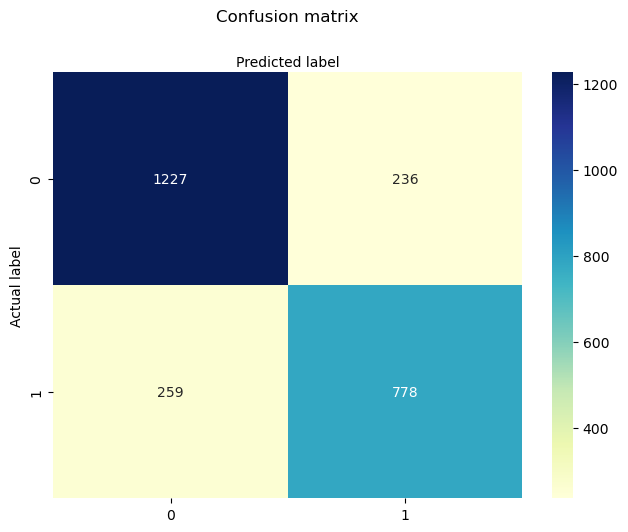

In [190]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')